In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

boston = load_iris()
X = boston.data[:,:-2]
y = boston.target

In [ ]:
features = boston.feature_names[:-2]
species = boston.target_names

In [ ]:
species

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 45)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

In [ ]:
tree_clf.fit(X_train,y_train)
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Training accuracy: ',accuracy_score(y_train,y_train_pred))
print('Testing accuracy: ',accuracy_score(y_test,y_test_pred))

Training accuracy:  0.95
Testing accuracy:  0.6333333333333333


In [ ]:
path = tree_clf.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00277778, 0.00277778, 0.00324074, 0.00518519,
       0.00555556, 0.00555556, 0.00694444, 0.00743464, 0.00868056,
       0.01041667, 0.01161038, 0.01230159, 0.01581699, 0.02010944,
       0.05683866, 0.06089286, 0.20756944])

([<matplotlib.axis.XTick at 0x7f6d96949e50>,
 <a list of 21 Text major ticklabel objects>)

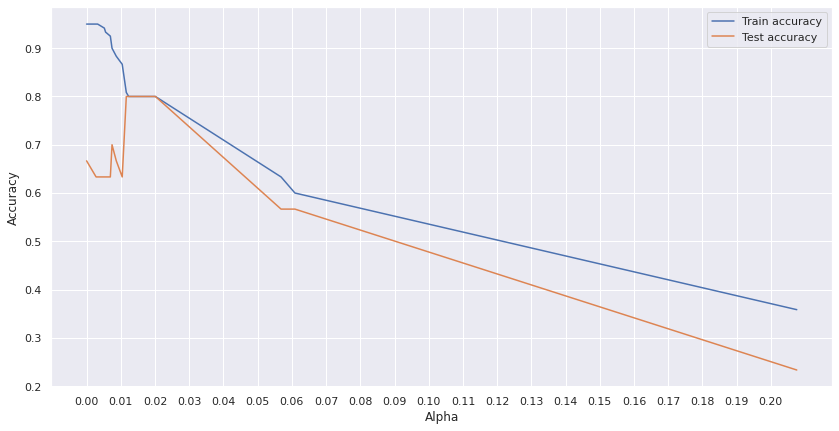

In [ ]:
import seaborn as sns
acc_train, acc_test = [],[]
for a in alphas:
  tree_clf = DecisionTreeClassifier(ccp_alpha=a)
  tree_clf.fit(X_train,y_train)
  y_train_pred = tree_clf.predict(X_train)
  y_test_pred = tree_clf.predict(X_test)
  acc_train.append(accuracy_score(y_train,y_train_pred))
  acc_test.append(accuracy_score(y_test,y_test_pred))
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y = acc_train, x = alphas, label = 'Train accuracy')
sns.lineplot(y = acc_test, x = alphas, label = 'Test accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.xticks(ticks = np.arange(0.00,0.21,0.01))

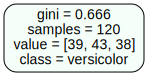

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                                feature_names=features,  
                                class_names=species,
                                rounded=True,
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph